### Задача 1

Так как специалисту по машинному обучению часто приходится сталкиваться с различными API и их документацией необходимо уметь с этим работать.
В рамках задачи нужно используя документацию https://yandex.ru/dev/direct/ получить токен песочницы написать на Python код собирающий данные по рекламным кампаниям Яндекс директ.

Как результат ожидается код для получения данных по кампаниям.

**Банк крупный рекламодатель в залоговом кредитовании, подумайте, какие показатели нам были бы интересны и как можно использовать данное API для улучшения показателей банка?**

In [1]:
import requests
import json

In [2]:
token = 'y0_AgAAAABD90gEAAZAOQAAAADs2l8n2994PsOnS0u-pConhPGKy7tRx6Y'

BaseURL = 'https://api-sandbox.direct.yandex.com/json/v5/'

#-------Получаем логины клиентов агентства песочницы--------

URL = BaseURL + 'agencyclients'

headers = {
    "Authorization": "Bearer " + token
}

data = {
    "method": "get",
    "params": {
        "SelectionCriteria": {},
        "FieldNames": [("Login")]
    }
}

response = requests.post(URL, json.dumps(data), headers=headers)

if response.status_code<400:
    client_logins = response.json()['result']['Clients']
else:
    raise requests.RequestException(f'{response.status_code} {response.reason}')

#-------Запрашиваем данные по рекламным кампаниям--------

URL = BaseURL + 'campaigns'

field_names = [
    ('BlockedIps'),
    ('ExcludedSites'),
    ('Currency'),
    ('DailyBudget'),
    ('Notification'),
    ('EndDate'),
    ('Funds'),
    ('ClientInfo'),
    ('Id'),
    ('Name'),
    ('NegativeKeywords'),
    ('RepresentedBy'),
    ('StartDate'),
    ('Statistics'),
    ('State'),
    ('Status'),
    ('StatusPayment'),
    ('StatusClarification'),
    ('SourceId'),
    ('TimeTargeting'),
    ('Type')
]

headers = {
    "Authorization": "Bearer " + token,
    "Client-Login": client_logins[0]['Login'] # Если необходимы данные по второму и третьему клиенту, то тут нужно 0 заменить на 1 и 2 соответственно
    
}

data = {
    "method": "get",
    "params": {
        "SelectionCriteria": {},
        "FieldNames": field_names
    }
}

response = requests.post(URL, json.dumps(data), headers=headers)
if response.status_code<400:
    campaigns_info = response.json() #Информация по всем компаниям первого клиента
else:
    raise requests.RequestException(f'{response.status_code} {response.reason}')

In [3]:
# Итоговая информация по кампаниям первого клиента
campaigns_info

{'result': {'Campaigns': [{'ClientInfo': 'Batman Johnes',
    'Notification': {'SmsSettings': {'TimeFrom': '09:00', 'TimeTo': '21:00'},
     'EmailSettings': {'Email': 'sbx-idzayo0tJ0Ho@yandex.ru',
      'CheckPositionInterval': 15,
      'WarningBalance': 20,
      'SendAccountNews': 'YES',
      'SendWarnings': 'YES'}},
    'Id': 458944,
    'Name': 'Test API Sandbox campaign 1',
    'StartDate': '2023-09-17',
    'Type': 'TEXT_CAMPAIGN',
    'Status': 'ACCEPTED',
    'State': 'OFF',
    'StatusPayment': 'ALLOWED',
    'StatusClarification': 'Funds have run out',
    'SourceId': None,
    'Statistics': {'Clicks': 13030, 'Impressions': 144305},
    'Currency': 'RUB',
    'Funds': {'Mode': 'CAMPAIGN_FUNDS',
     'CampaignFunds': {'Sum': 10000000000,
      'Balance': 0,
      'BalanceBonus': 0,
      'SumAvailableForTransfer': 0}},
    'RepresentedBy': {'Manager': None, 'Agency': 'Горбенко Игорь'},
    'DailyBudget': None,
    'EndDate': None,
    'NegativeKeywords': {'Items': ['keyword

Ячейка Markdown в которой можно написать свои мысли по использованию API, чтобы продавать кредитов больше или тратить для этого на рекламу меньше:

Можно провести A/B тест, сравнить между собой эффективность рекламных компаний в зависимости от расписания её показа. Узнать, какие события повышают интерес к взятию кредитов сопоставив с ними рост числа конверсий.
В общем, самыми полезными данными из Yandex API будут временные ряды CTR и CPC.

### Задача 2

Базовое знание XML полезно для работы, так как в данном формате происходит обмен информацией между внешними источниками и системой принятия решений (СПР) банка. В рамках задачи необходимо написать код, получающий информацию о каталоге CD дисков с адреса https://www.w3schools.com/xml/cd_catalog.xml .

Данная задача должна показать ваши навыки по работе с XML форматом, поэтому уход в pandas не приветствуется, так как в реальной рабочей задаче будут технические ограничения по работе с pandas.

Напишите код, который:

1)         Считает стоимость всех дисков в каталоге.

2)         Какой год для дисков в каталоге является последним (самым современным)

3)         Компания «Polydor» сменила своё название на «Poly», измените название этой компании у всех CD на актуальное в XML каталоге и сохраните новый XML файл

In [4]:
import xml.etree.ElementTree as et

In [5]:
response = requests.get('https://www.w3schools.com/xml/cd_catalog.xml')
with open('cd_catalog.xml', 'w') as f:
    f.writelines(response.text)
tree = et.parse('cd_catalog.xml')

In [6]:
# Считаем стоимость всех дисков
root = tree.getroot()
price_sum = sum([float(price.text) for price in root.iter('PRICE')])
round(price_sum, 2)

237.0

In [7]:
# Находим самый последний год
max([int(year.text) for year in root.iter('YEAR')])

1999

In [8]:
# Изменяем название Polydor
for company in root.iter('COMPANY'):
    if company.text == 'Polydor':
        company.text = 'Poly'
# Записывем изменения
tree.write('new_cd_catalog.xml')

### Задача 3

В качестве OLAP БД используется clickhouse, поэтому знание базового SQL синтаксиса является важным для выборок данных.

*Базовой библиотекой для clickhouse является clickhouse-connect, поэтому предполагается использование данного коннектора*

In [205]:
import clickhouse_connect
from clickhouse_connect.driver import Client as ClickHouseClient
import pandas as pd

client:ClickHouseClient = clickhouse_connect.get_client(host='play.clickhouse.com',
                                           username='play',
                                           password='clickhouse',
                                           database='default',
                                           secure=True,
                                           port=443)

# тестовые данные playground clickhouse совпадают не полностью, но являются данными похожими на hits метрики https://yandex.ru/dev/metrika/doc/api2/logs/fields/hits.html
client.query_df('DESCRIBE TABLE default.hits')

,name,type,default_type,default_expression,comment,codec_expression,ttl_expression
0,WatchID,UInt64,,,,,
1,JavaEnable,UInt8,,,,,
2,Title,String,,,,,
3,GoodEvent,Int16,,,,,
4,EventTime,DateTime,,,,,
...,...,...,...,...,...,...,...
100,FromTag,String,,,,,
101,HasGCLID,UInt8,,,,,
102,RefererHash,UInt64,,,,,
103,URLHash,UInt64,,,,,


##### Так как "hits" хранит каждую просмотренную страницу и может содержать сотни миллионов записей, необходимо использовать SQL запросы для ответа на некоторые базовые вопросы.

In [10]:
### Пример запроса, количество записей в таблице
sql = '''
SELECT count(*) AS cnt
FROM default.hits
'''

client.query_df(sql)

,cnt
0,100000000


**Мы подразумеваем, что WatchID уникален, так ли это?**

In [11]:
sql = '''
SELECT count(DISTINCT WatchID) AS unq
FROM default.hits
'''
client.query_df(sql)

,unq
0,99997493


Полученное число меньше 100000000, значит WatchID не уникален (или существуют пропущенные или нулевые значения WatchID)

**Сколько просмотров в среднем делает каждый юзер?**

In [12]:
sql = '''
SELECT avg(cnt) AS avg_views
FROM (SELECT count(*) as cnt
    FROM default.hits
    GROUP BY UserID)
'''
client.query_df(sql)

,avg_views
0,5.671836


**Сильно ли отличается количество средних просмотров по счётчикам?**

In [13]:
sql = '''
SELECT
avg_counter_1,
avg_counter_2
FROM
(
    SELECT avg(cnt) AS avg_counter_1
    FROM (SELECT count(*) as cnt
        FROM default.hits
        WHERE CounterClass = 1
        GROUP BY UserID)
) AS avg_counter_1,
(
    SELECT avg(cnt) AS avg_counter_2
    FROM (SELECT count(*) as cnt
        FROM default.hits
        WHERE CounterClass = 0
        GROUP BY UserID)
) AS avg_counter_2
'''
client.query_df(sql)

,avg_counter_1,avg_counter_2
0,4.268207,6.81128


Да, отличается довольно сильно

### Задача 4

**Часть хитов помечены как DontCountHits в таблице default.hits, от каких показателей это зависит? Меняется ли данный показатель во времени?**

Можно пользоваться моделями, корреляцией и другими инструментами, которые могут помочь в ответе на данный вопрос


In [149]:
#Для начала импортируем все нужные библиотеки
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [15]:
sql = '''
SELECT * FROM default.hits
'''
df = client.query_df(sql)

In [16]:
#Теперь уберём все малозначимые переменные, то есть те, у которых одно уникальное значение или одно сильно доминирующее значение (>99%)
ban_list = []
for item in tqdm(df.columns):
    sql = f'''
    SELECT COUNT(*) AS cnt, {item} FROM default.hits
    GROUP BY {item}
    ORDER BY cnt DESC
    '''
    if len(client.query_df(sql)) == 1 or client.query_df(sql)['cnt'][0]>99000000:
        ban_list.append(item)
    if 80000000<client.query_df(sql)['cnt'][0]<99000000:
        bin_list.append(item)
        
print(len(ban_list), ban_list)    


100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [01:11<00:00,  1.46it/s]

28 ['GoodEvent', 'CookieEnable', 'JavascriptEnable', 'AdvEngineID', 'SilverlightVersion4', 'IsDownload', 'IsOldCounter', 'IsEvent', 'IsParameter', 'OpenerName', 'SocialNetwork', 'SocialAction', 'HTTPError', 'SocialSourceNetworkID', 'SocialSourcePage', 'ParamPrice', 'ParamOrderID', 'ParamCurrency', 'ParamCurrencyID', 'OpenstatServiceName', 'OpenstatCampaignID', 'OpenstatAdID', 'OpenstatSourceID', 'UTMContent', 'UTMTerm', 'FromTag', 'HasGCLID', 'CLID']
25 ['Refresh', 'FlashMajor', 'NetMajor', 'NetMinor', 'IsMobile', 'MobilePhone', 'MobilePhoneModel', 'Params', 'SearchEngineID', 'SearchPhrase', 'IsArtifical', 'IsLink', 'IsNotBounce', 'OriginalURL', 'DontCountHits', 'WithHash', 'HitColor', 'BrowserLanguage', 'SendTiming', 'DNSTiming', 'ConnectTiming', 'FetchTiming', 'UTMSource', 'UTMMedium', 'UTMCampaign']


In [63]:
#Теперь ручками избавимся от переменных, которые логически не могут влиять
bad_columns = {
    'URL', 'WindowClientWidth', 'WindowClientHeight','WatchID', 'Title', 'UserID', 'URLHash', 'RefererHash',
    'GoodEvent', 'CounterID', 'OpenstatSourceID', 'UTMTerm', 'CLID', 'BrowserCountry'
    'ParamCurrencyID', 'OpenstatServiceName', 'OpenstatCampaignID', 'OpenstatAdID', 'UTMSource', 'FromTag', 
    'UTMContent', 'UTMCampaign', 'UTMMedium', 'ResponseEndTiming', 'SocialSourceNetworkID', 'ParamCurrency', 'ParamOrderID',
    'ParamPrice', 'SocialSourcePage', 'URL', 'Referer', 'SocialAction', 'SocialNetwork', 'FUniqID', 'ResolutionHeight',
    'HID', 'RemoteIP', 'PageCharset', 'WindowName', 'ResolutionWidth', 'ResolutionDepth', 'EventDate', 'EventTime', 
    'LocalEventTime', 'ClientEventTime', 'OriginalURL', 'Params', 'SearchPhrase', 'BrowserLanguage', 'MobilePhoneModel'
}

In [64]:
columns = set(df.columns) - set(ban_list) - bad_columns
print(len(columns))
sql_columns = ', '.join(columns) # Получаем колонки с полезными данными

46


In [195]:
#Получим таблицу с данными из SQL
dfs = []
for i in tqdm(range(2000)):
    sql = f'''
    SELECT {sql_columns} FROM default.hits
    OFFSET {i*8192}
    '''
    dfs.append(client.query_df(sql))

mid_df = pd.concat(dfs, ignore_index=True)
mid_df

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:38<00:00,  9.17it/s]


,ClientIP,NetMajor,UserAgent,SilverlightVersion1,Age,Income,ConnectTiming,IsLink,IsArtifical,CodeVersion,...,SearchEngineID,Refresh,ResponseStartTiming,DontCountHits,BrowserCountry,NetMinor,RefererCategoryID,CounterClass,URLCategoryID,WithHash
0,704073439,0,5,0,0,0,0,0,0,1,...,0,1,0,0,b'\xd0\x0c',0,119,1,92,0
1,704073439,0,5,0,0,0,0,0,0,1,...,0,0,0,0,b'\xd0\x0c',0,119,1,92,0
2,704073439,0,5,0,0,0,0,0,0,1,...,0,1,0,0,b'\xd0\x0c',0,119,1,92,0
3,704073439,0,5,0,0,0,0,0,0,1,...,0,0,0,0,b'\xd0\x0c',0,306,1,304,0
4,704073439,0,5,0,0,0,0,0,0,1,...,0,0,0,0,b'\xd0\x0c',0,306,1,304,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11348295,1142200424,0,2,4,50,2,0,0,1,1601,...,0,0,0,0,b'\xd0\x0c',0,16124,0,14328,0
11348296,1142200424,0,2,4,50,2,0,0,1,1601,...,0,0,0,0,b'\xd0\x0c',0,16124,0,14328,0
11348297,1142200424,0,2,4,50,2,0,0,1,1601,...,0,0,0,0,b'\xd0\x0c',0,16124,0,14328,0
11348298,1142200424,0,2,4,50,2,0,0,1,1601,...,0,1,0,0,b'\xd0\x0c',0,16124,0,14328,0


In [196]:
# Для модели переведём качественные данные в количественные 
def bc_bool(x):
    if x == b'\xd0\x0c':
        return 1
    if x == b'h1':
        return 2
    return 0
def flash_num(x):
    try:
        return float(x)
    except:
        return 0
def mpm_bool(x):
    if x == '':
        return 0
    if x == 'iPad':
        return 1
    return 2
def hc_bool(x):
    if x == b'5':
        return 0
    if x == b'6':
        return 1
    return 2
mid_df['UserAgentMinor'] = mid_df['UserAgentMinor'].apply(uam_bool)
mid_df['FlashMinor2'] = mid_df['FlashMinor2'].apply(flash_num)
mid_df['HitColor'] = mid_df['HitColor'].apply(hc_bool)
mid_df['BrowserCountry'] = mid_df['BrowserCountry'].apply(bc_bool)

In [197]:
#Посчитаем корреляции
mid_df.corr()['DontCountHits']
# Видно, что параметр DontCountHits сильно коррелирует с параметрами IsNotBounce и IsArtifical

ClientIP               0.001572
NetMajor               0.022162
UserAgent             -0.002738
SilverlightVersion1   -0.000749
Age                    0.019153
Income                 0.019118
ConnectTiming         -0.006861
IsLink                 0.425621
IsArtifical            0.617312
CodeVersion            0.247836
UserAgentMinor         0.001771
HistoryLength          0.023897
RegionID              -0.008016
IsNotBounce            0.854720
FlashMajor             0.001755
URLRegionID           -0.024080
JavaEnable             0.003387
RefererRegionID       -0.050275
Interests             -0.004833
MobilePhone           -0.000398
Sex                    0.010952
OS                    -0.000952
FetchTiming           -0.000207
UserAgentMajor        -0.012078
FlashMinor2           -0.001449
ClientTimeZone         0.002970
IPNetworkID           -0.001285
TraficSourceID         0.122753
SendTiming             0.011152
SilverlightVersion2    0.002795
FlashMinor            -0.025033
Silverli

In [203]:
# Разбиваем выборку на Test и Train
cols = mid_df.drop(['DontCountHits', 'BrowserCountry'], axis=1).columns
df_train, df_test = train_test_split(mid_df, train_size=0.67)
df_train_x = df_train[cols]
df_train_y = df_train['DontCountHits']
df_test_x = df_test[cols]
df_test_y = df_test['DontCountHits']

Best alpha = 60.0000
0.999564500731773


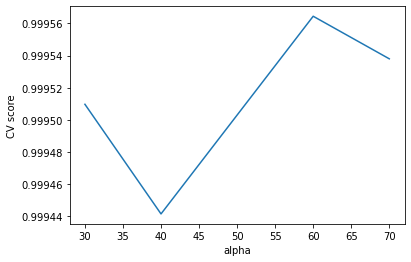

In [202]:
#Используем модель Случайного леса с кросс-валидацией и разными параметрами
alphas = [30, 40, 60, 70]
current_model = RandomForestClassifier(n_estimators=400)
searcher_lr = GridSearchCV(current_model, [{'min_samples_split': alphas}],
                        scoring="roc_auc", cv=4, n_jobs=-1)
searcher_lr.fit(df_train_x, df_train_y)
best_alpha = searcher_lr.best_params_['min_samples_split']
print("Best alpha = %.4f" % best_alpha) # Лучший параметр альфа по результатам гридсёрча
print(max(searcher_lr.cv_results_["mean_test_score"])) 
plt.plot(alphas, searcher_lr.cv_results_["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("CV score"); 


In [204]:
# Так как данных очень много, метод случайного леса будет работать долго. Чуть более простая модель
# Decison tree выдаст не менее точное предсказание, но с меньшими затратами вычислительных ресурсов
current_model = DecisionTreeClassifier()
current_model.fit(df_train_x, df_train_y)
print(f'ROC AUC:', roc_auc_score(df_test_y, current_model.predict_proba(df_test_x)[:,1]))
print('Accuracy:', accuracy_score(df_test_y, current_model.predict(df_test_x)))
print('Precision:', precision_score(df_test_y, current_model.predict(df_test_x)))
print('Recall:', recall_score(df_test_y, current_model.predict(df_test_x)))

ROC AUC: 0.9998705092478836
Accuracy: 0.9999041372903538
Precision: 0.9999268299821465
Recall: 0.9987612139372568


Как итог, предсказать значение DontCountHits можно почти со 100% вероятностью.
Больше всего оно коррелирует с показателями IsNotBounce, IsArtifical, IsLink и CodeVersion

Что касается времени, мы можем посмотреть корреляцию абсолютного времени с DontCountHits, и ещё распределение по дням недели и времени суток

In [221]:
time_dfs = []
for i in tqdm(range(2000)):
    sql = f'''
    SELECT DontCountHits, EventDate, EventTime
    FROM default.hits
    OFFSET {i*65409}
    '''
    time_dfs.append(client.query_df(sql))

time_df = pd.concat(time_dfs, ignore_index=True)

time_df

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:10<00:00, 15.27it/s]


,DontCountHits,EventDate,EventTime
0,0,2013-07-10,2013-07-10 10:42:40+00:00
1,0,2013-07-10,2013-07-10 10:42:58+00:00
2,0,2013-07-10,2013-07-10 10:43:05+00:00
3,0,2013-07-10,2013-07-10 10:44:54+00:00
4,0,2013-07-10,2013-07-10 10:46:09+00:00
...,...,...,...
57677882,0,2013-07-31,2013-07-31 12:39:25+00:00
57677883,0,2013-07-31,2013-07-30 21:16:32+00:00
57677884,0,2013-07-31,2013-07-31 12:36:42+00:00
57677885,0,2013-07-31,2013-07-31 12:38:52+00:00


In [222]:
time_df['Day of the week'] = time_df['EventDate'].apply(lambda x: x.day_name()) #Добавим столбец с днём недели

In [224]:
day_sum = time_df.groupby(['Day of the week']).sum()
day_sum

,DontCountHits
Day of the week,
Friday,63814.0
Monday,1812610.0
Saturday,424768.0
Sunday,1112295.0
Tuesday,1215074.0
Wednesday,651335.0


In [225]:
day_cnt = time_df.groupby(['Day of the week']).count()
day_cnt

,DontCountHits,EventDate,EventTime
Day of the week,,,
Friday,2266502,2266502,2266502
Monday,12890953,12890953,12890953
Saturday,3630919,3630919,3630919
Sunday,15975046,15975046,15975046
Tuesday,10092733,10092733,10092733
Wednesday,12821734,12821734,12821734


Заметим, что наблюдений по пятнице очень мало

In [240]:
#Посчитаем процентное соотношение DontCountHits от общего числа наблюдений в конкретный день
[(ktem, 100*item/jtem) for item, jtem, ktem in zip(day_sum['DontCountHits'], day_cnt['DontCountHits'], day_sum.index)]

[('Friday', 2.8155280692450306),
 ('Monday', 14.061101611339364),
 ('Saturday', 11.69863607532969),
 ('Sunday', 6.962702955597123),
 ('Tuesday', 12.039097834055454),
 ('Wednesday', 5.079929126590834)]

Как видно, DontCountHits очень разнятся по дням недели

In [255]:
# Теперь добавим столбец для времени суток
def day_part(x):
    day_parts = ['Night', 'Morning', 'Daytime', 'Evening']
    return day_parts[x.hour//6]

time_df['Part of day'] = time_df['EventTime'].apply(day_part)

In [263]:
time_sum = time_df.groupby(['Part of day']).sum()
time_sum

,DontCountHits
Part of day,
Daytime,1326190.0
Evening,1314886.0
Morning,1320875.0
Night,1317945.0


In [264]:
time_cnt = time_df.groupby(['Part of day']).count()
time_cnt

,DontCountHits,EventDate,EventTime,Day of the week
Part of day,,,,
Daytime,14442543,14442543,14442543,14442543
Evening,14476048,14476048,14476048,14476048
Morning,14361854,14361854,14361854,14361854
Night,14397442,14397442,14397442,14397442


Тут даже считать ничего не надо, и так видно, что в течении дня значение DontCountHits никак не меняется